# Net Load Visualization

This notebook demonstrates how to use create a unique net load visualization using data from the Grid Status API and Plotly

For more information about the API, please visit: https://www.gridstatus.io/api

In [1]:
import gridstatusio
import plotly.graph_objects as go
import pandas as pd

gridstatusio.__version__

'0.4.0'

## Setting up the API client

First, we need to set up the GridStatusClient by providing our API key. You can either set the API key using the GRIDSTATUS_API_KEY environment variable or pass it to the constructor directly.

In [2]:
# gridstatusio.GridStatusClient(api_key="YOUR_API_KEY_HERE")
client = gridstatusio.GridStatusClient()

## Query Data

Select the ISO and date range to get data for. Specify `tz` to set the time zone of timestamp in the returned data

In [31]:
# pick ISO to visualize (ercot, caiso, pjm, miso, isone, nyiso, spp)
ISO = "ercot"
START = "Jul 1, 2023"
END = "Aug 1, 2023"

df = client.get_dataset(
    dataset=f"{ISO}_standardized_hourly",
    start=START,
    end=END,
    tz="US/Central",
)

df

Fetching Page 1...Done in 0.65 seconds. 

Total number of rows: 744


,interval_start_local,interval_end_local,load_forecast.load_forecast,load.load,net_load,renewables,renewables_to_load_ratio,fuel_mix.coal_and_lignite,fuel_mix.hydro,fuel_mix.nuclear,fuel_mix.power_storage,fuel_mix.solar,fuel_mix.wind,fuel_mix.natural_gas,fuel_mix.other
0,2023-07-01 00:00:00-05:00,2023-07-01 01:00:00-05:00,57703.708557,57371.583333,42435.583333,14946.241667,0.260516,9991.041667,10.241667,4647.825000,52.058333,0.075000,14935.925000,28033.925000,50.583333
1,2023-07-01 01:00:00-05:00,2023-07-01 02:00:00-05:00,55133.591049,54418.916667,39245.383333,15184.233333,0.279025,8444.666667,10.700000,4648.125000,90.783333,0.133333,15173.400000,26298.516667,50.766667
2,2023-07-01 02:00:00-05:00,2023-07-01 03:00:00-05:00,53079.900625,52418.250000,39752.491667,12695.816667,0.242202,8848.083333,30.058333,4648.133333,39.900000,0.175000,12665.583333,26516.108333,50.491667
3,2023-07-01 03:00:00-05:00,2023-07-01 04:00:00-05:00,51503.809494,50700.000000,39481.475000,11229.908333,0.221497,8844.108333,11.383333,4648.175000,5.600000,0.091667,11218.433333,26312.975000,50.316667
4,2023-07-01 04:00:00-05:00,2023-07-01 05:00:00-05:00,50575.801997,49464.666667,38177.883333,11296.808333,0.228381,7679.100000,10.025000,4649.508333,0.550000,0.100000,11286.683333,25974.008333,50.366667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,2023-07-31 19:00:00-05:00,2023-07-31 20:00:00-05:00,78482.651922,79682.666667,66683.483333,13167.908333,0.165254,11549.125000,168.725000,4925.475000,759.966667,3143.333333,9855.850000,48654.116667,102.891667
740,2023-07-31 20:00:00-05:00,2023-07-31 21:00:00-05:00,75881.255437,76981.250000,66611.416667,10539.808333,0.136914,11686.591667,169.975000,4927.766667,590.533333,218.091667,10151.741667,48463.316667,104.983333
741,2023-07-31 21:00:00-05:00,2023-07-31 22:00:00-05:00,73259.485713,75128.333333,63102.458333,12050.841667,0.160403,11712.975000,24.966667,4930.858333,197.508333,12.283333,12013.591667,45654.300000,103.725000
742,2023-07-31 22:00:00-05:00,2023-07-31 23:00:00-05:00,69859.605413,71309.833333,56603.116667,14711.100000,0.206298,11491.566667,4.383333,4937.408333,161.433333,10.300000,14696.416667,40021.083333,88.175000


## Make Graph

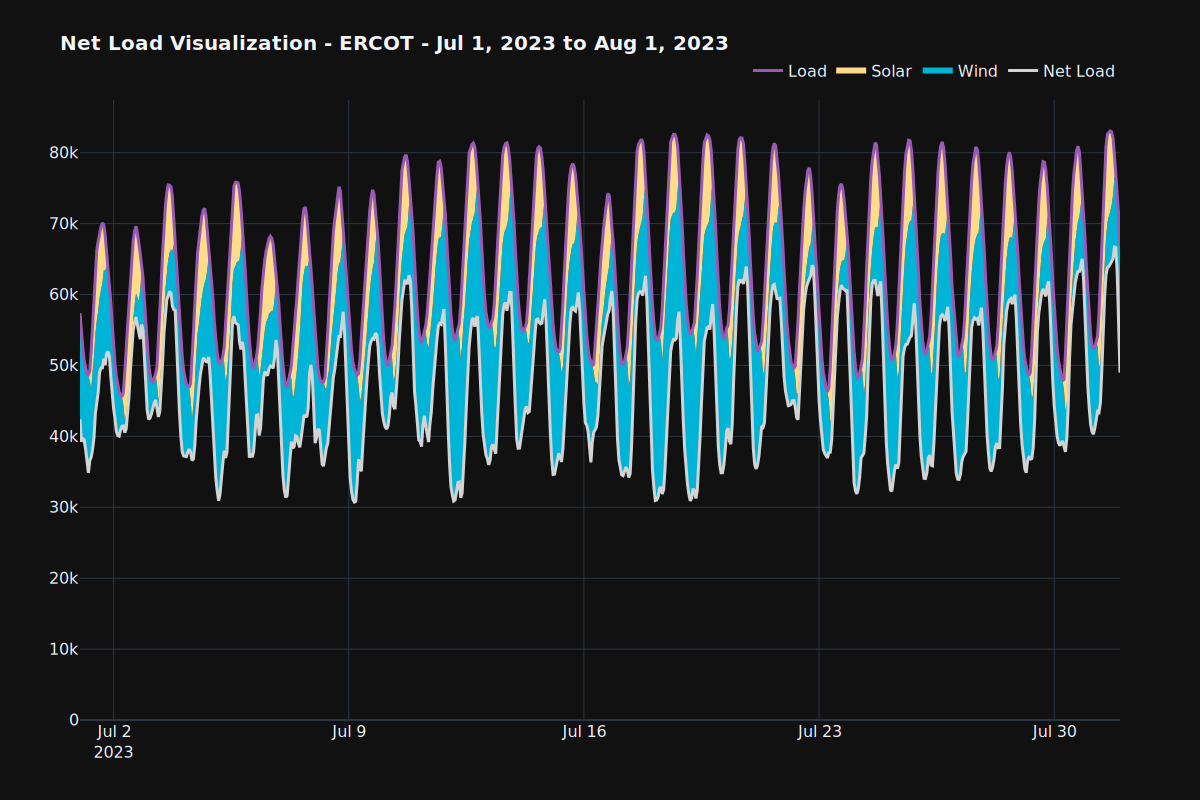

In [44]:
fig = go.Figure()

# define colors
yellow = "#ffdc89"
light_blue = "#00b4d8"
purple = "#9b59b6"
gray = "#D3D3D3"

# add traces
fig.add_trace(
    go.Scatter(
        x=df["interval_start_local"],
        y=df["net_load"],
        name="Net Load",
        stackgroup="one",
        fill="none",
        # burnt red
        line=dict(color=gray, width=3),
    )
)

fig.add_trace(
    go.Scatter(
        x=df["interval_start_local"],
        y=df["fuel_mix.wind"],
        name="Wind",
        fill="tonexty",
        stackgroup="one",
        mode="none",
        fillcolor=light_blue,
    )
)

fig.add_trace(
    go.Scatter(
        x=df["interval_start_local"],
        y=df["fuel_mix.solar"],
        name="Solar",
        fill="tonexty",
        stackgroup="one",
        mode="none",
        fillcolor=yellow,
    )
)

fig.add_trace(
    go.Scatter(
        x=df["interval_start_local"],
        y=df["load.load"],
        name="Load",
        mode="lines",
        line=dict(color=purple, width=3),
    )
)

# Horizontal legend
fig.update_layout(
    template="plotly_dark",
    title=f"<b>Net Load Visualization - {ISO.upper()} - {START} to {END} </b>",
    # bold title
    title_font=dict(size=20),
    font=dict(size=16),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1,
    ),
)

fig.show("svg", width=1200, height=800)